# Digit Prediction 

**AIM**- Predicting digit

**Dataset Information**
This dataset contains:
- 60000 data points in train set.
- 10000 data points in test set.
- Each data points represent a digit image of 28 x 28 with greyscale channel.
- Their are total 10 classes each for digit in range of 0 to 9.
**Dataset Source**

[DataSet](http://yann.lecun.com/exdb/mnist/)

# 0. Required Imports

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import Sequential
from keras.optimizers import Adam
from tensorflow.keras import datasets

# 1. Dataset Collection

In [2]:
mnist_dataset = datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# 2. Visualizing the images

An image in form of array of dimension 28 x 28

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Image would look something like this

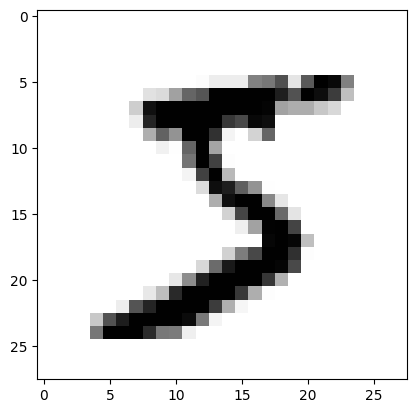

In [6]:
plt.imshow(x_train[0], cmap="binary")
plt.show()

<Axes: >

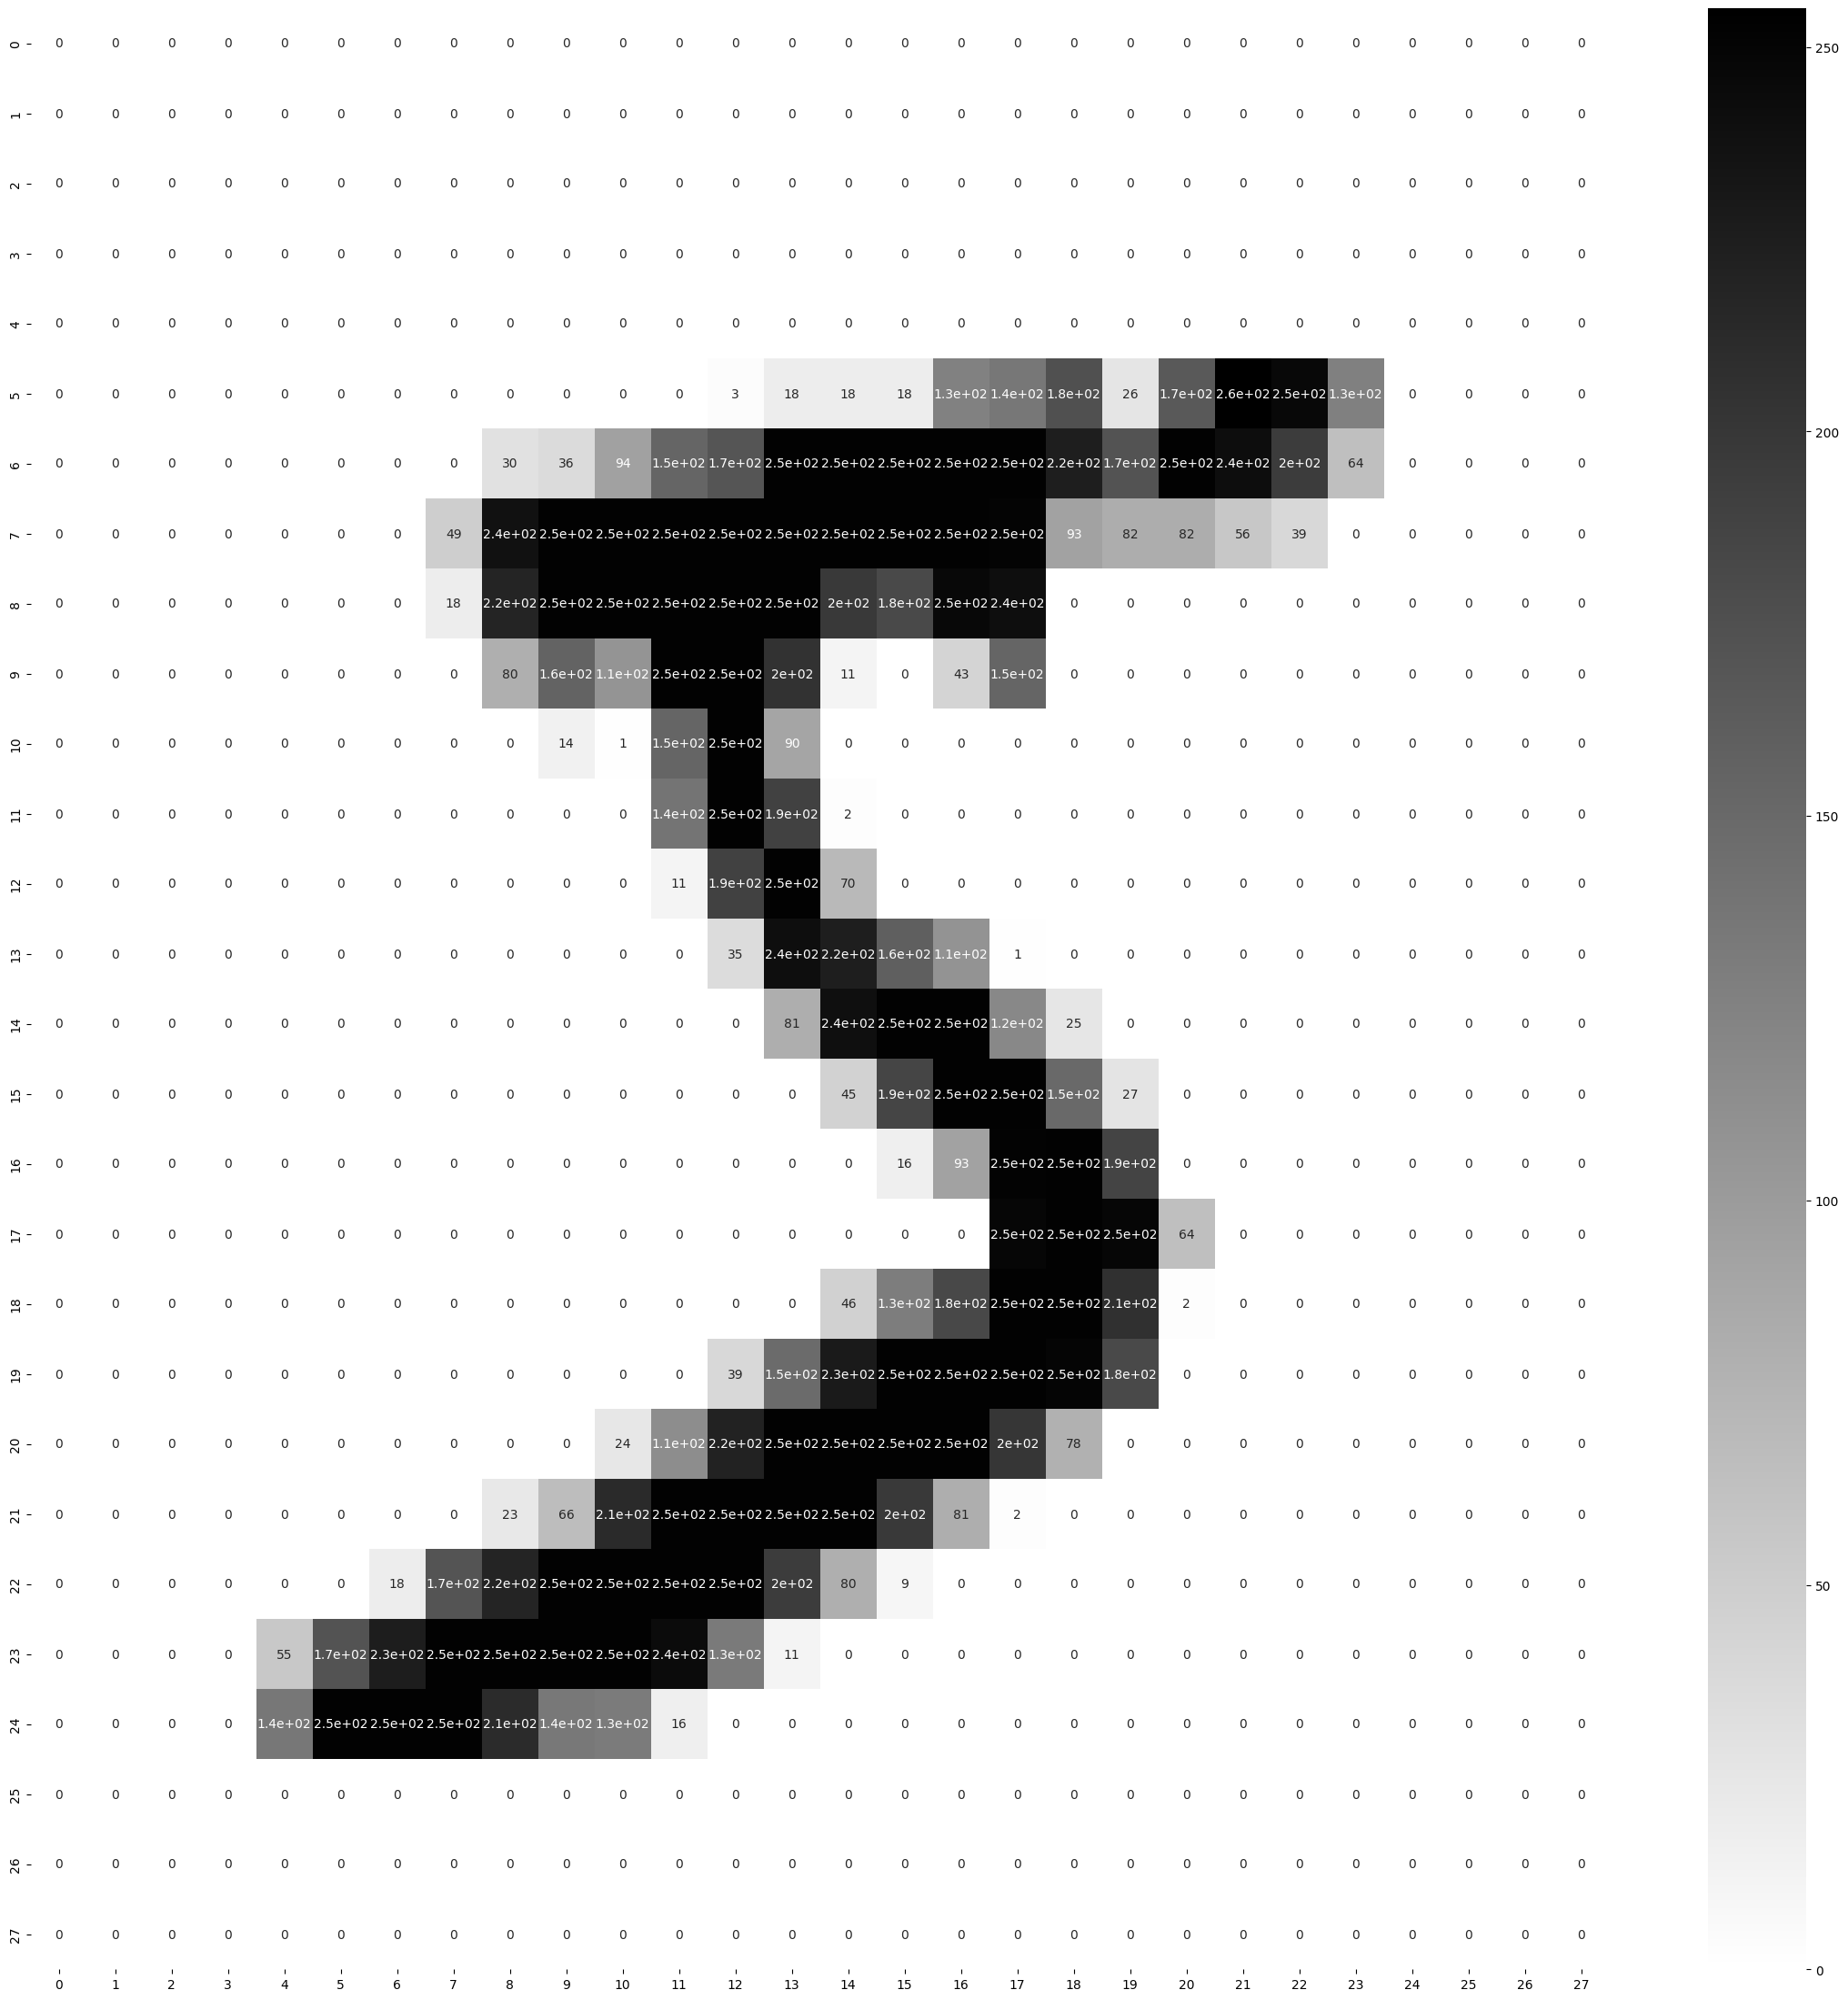

In [7]:
plt.figure(figsize=(28, 28))
sns.heatmap(x_train[0], cmap="binary", annot=True)

Values of each pixel is ranging between 0 to 255 i.e from black to white.

In order to improve the efficiency of the model to converge over these values we need to scale them. 

It will also help visualize it better.

Now the values will range only between 0 and 1.

In [8]:
x_train = x_train / 255
x_test = x_test / 255

Visualizing it again we can verify the values are in range of 0 to 1.

<Axes: >

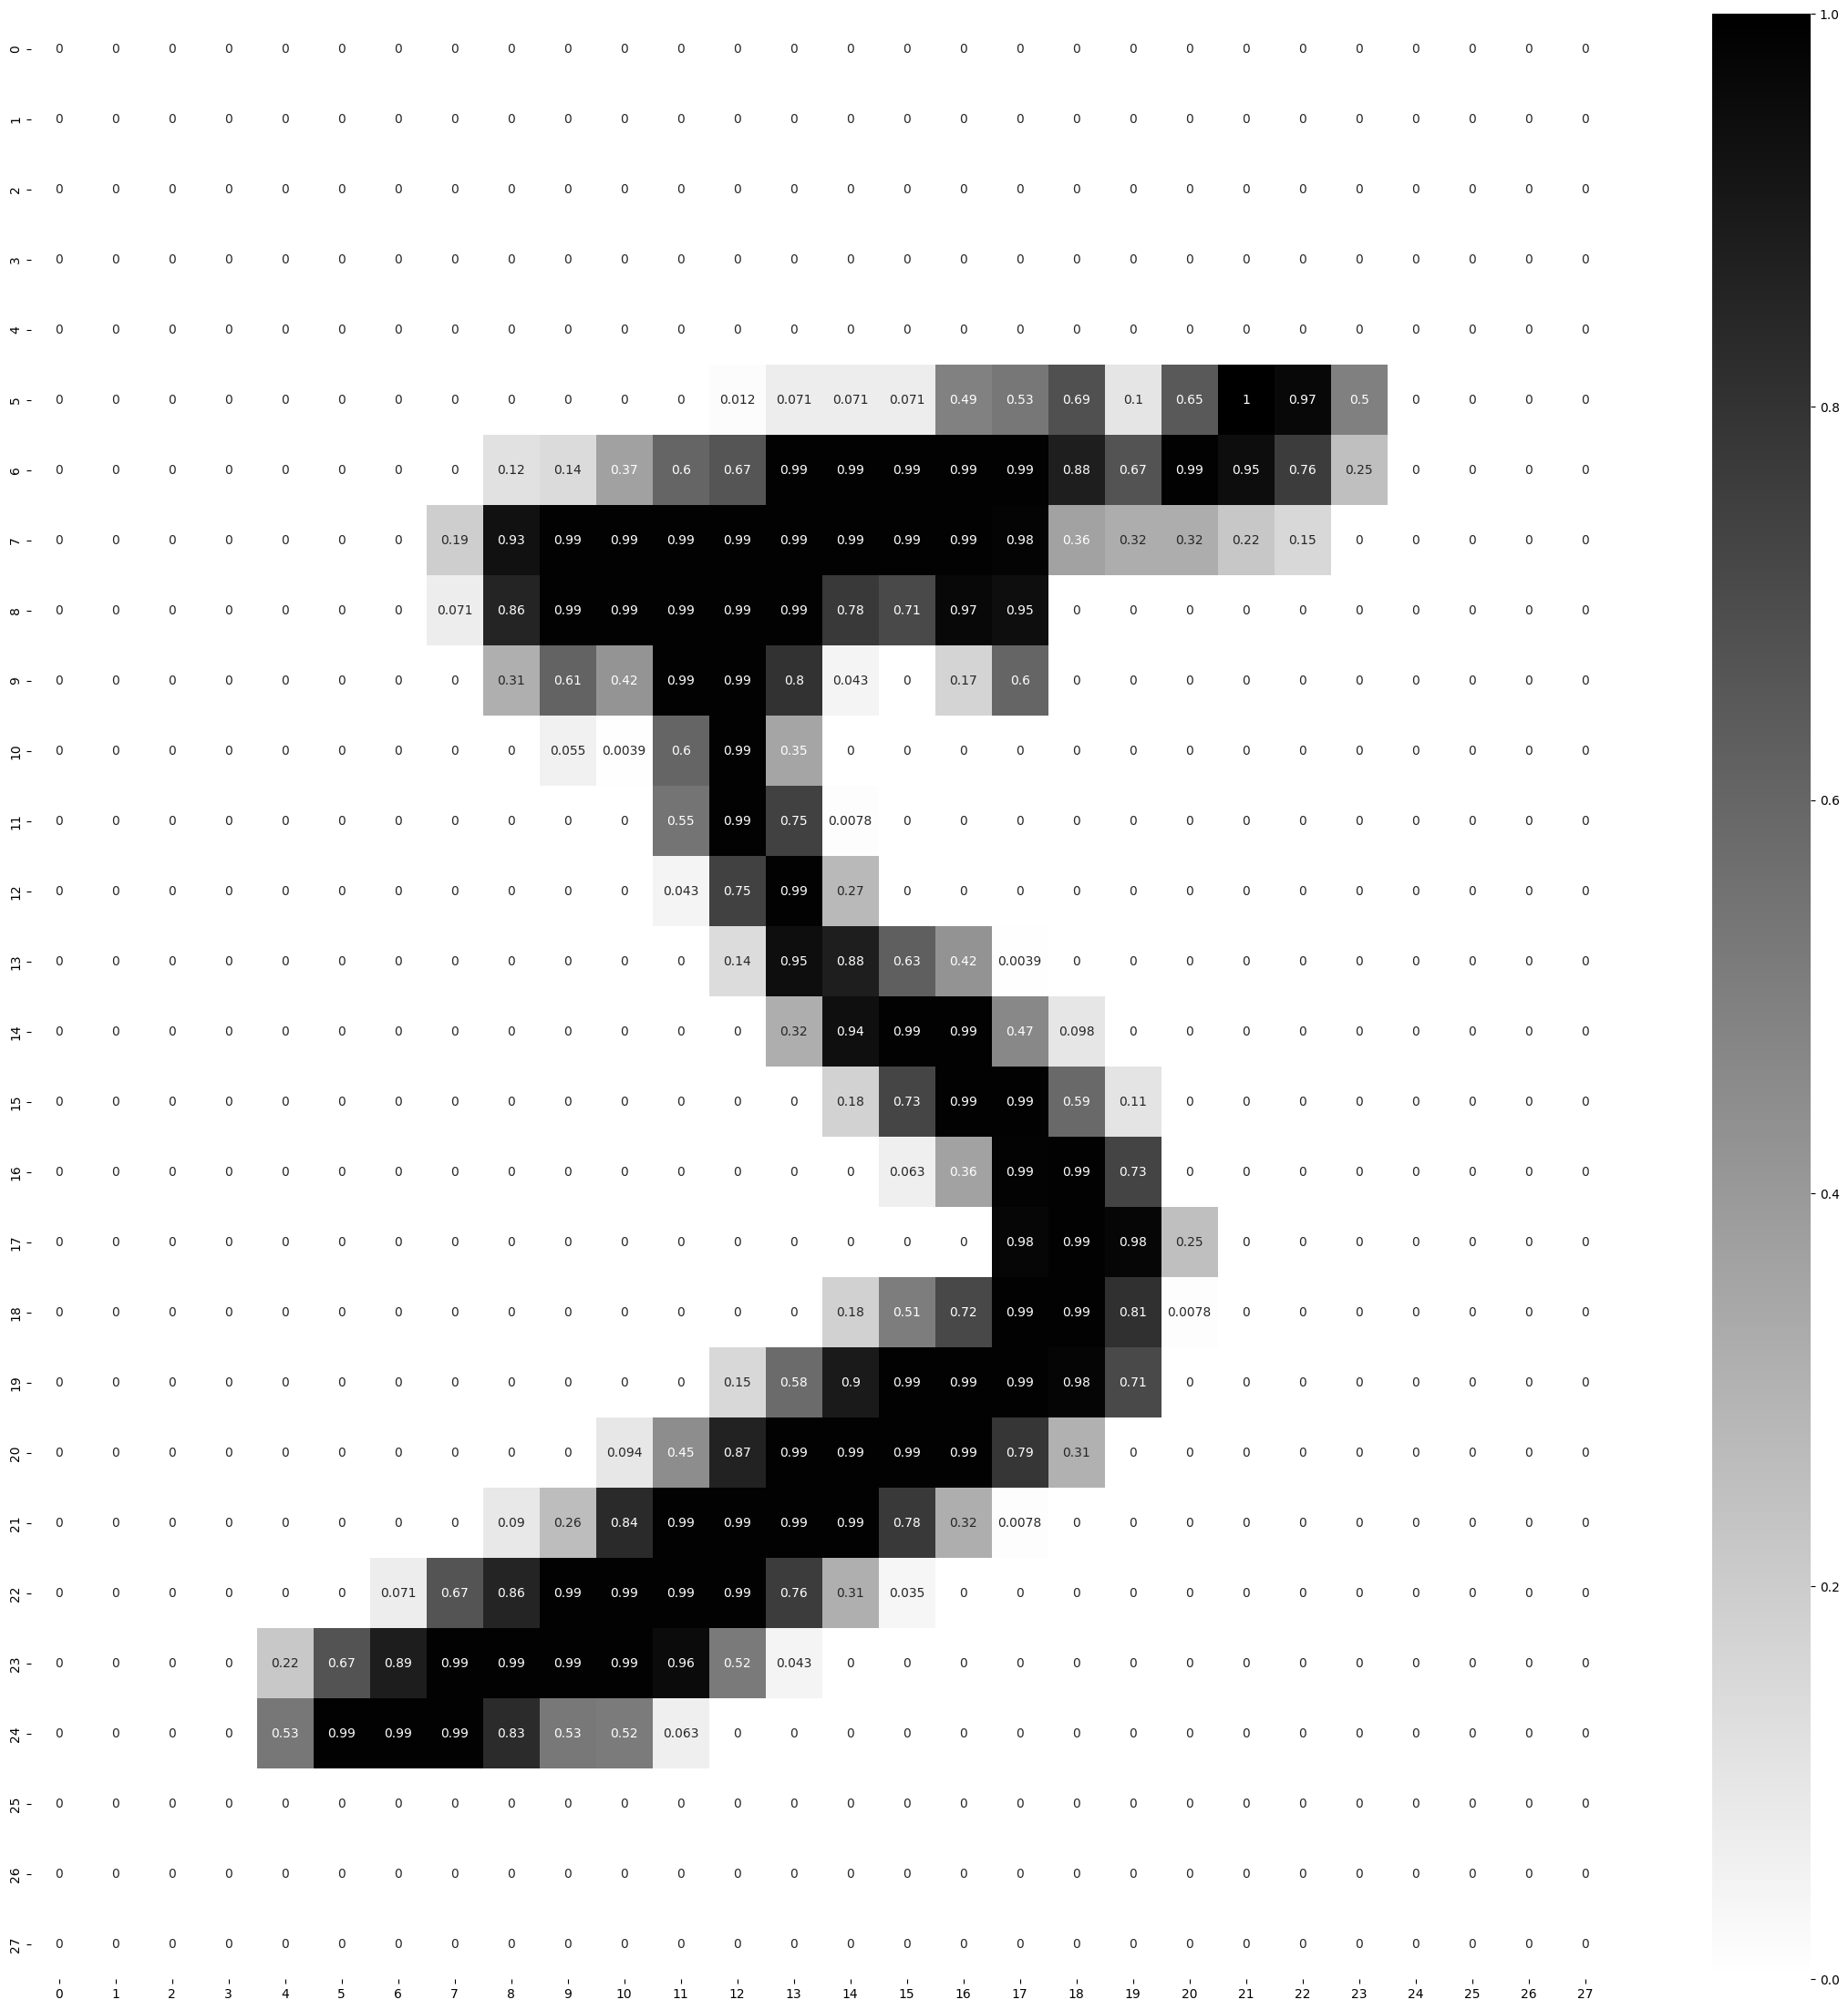

In [9]:
plt.figure(figsize=(28, 28))
sns.heatmap(x_train[0], cmap="binary", annot=True)

# 3. Model Building

As x_train and x_test are 2D array containing subarrays, each subarray contains pixel which forms images.

But the ANN input layers accept inputs as a 1D array, so we would transform this 2D array into 1D array by process callled Flattening and obtained array is called 1D flattend array.


```
x_train_flattend = x_train.reshape(len(x_train), 28 * 28)
x_test_flattend = x_test.reshape(len(x_test), 28 * 28)
```


Or Instead of flattening manually we can specify specify the `input_shape=[28, 28]` in Flatten Input layer of ANN

In [10]:
ann = Sequential(
    [
      Flatten(input_shape=[28, 28], name="input_flatten_layer"),
      Dense(units=300, activation="relu", name="hidden_layer_1"),
      Dense(units=100, activation="relu", name="hidden_layer_2"),
      Dense(units=10, activation="softmax", name="output_layer")
    ]
)

In [11]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_flatten_layer (Flatte  (None, 784)              0         
 n)                                                              
                                                                 
 hidden_layer_1 (Dense)      (None, 300)               235500    
                                                                 
 hidden_layer_2 (Dense)      (None, 100)               30100     
                                                                 
 output_layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


We can observe input/flattend layer has shape of 1 * 784, i.e a 1D array of length 784 which is due the fact of 28 * 28 = 784

Now we will compile the neural network.

In [12]:
ann.compile(
    optimizer="Adam", 
    loss="sparse_categorical_crossentropy", 
    metrics=["accuracy"]
    )

In [13]:
ann_train_history = ann.fit(
    x_train, y_train, 
    epochs=10, 
    validation_split=0.2
    )

Epoch 1/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2252 - accuracy: 0.9322 - val_loss: 0.1336 - val_accuracy: 0.9598
Epoch 2/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0930 - accuracy: 0.9715 - val_loss: 0.0989 - val_accuracy: 0.9700
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0619 - accuracy: 0.9804 - val_loss: 0.0993 - val_accuracy: 0.9718
Epoch 4/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0450 - accuracy: 0.9858 - val_loss: 0.0923 - val_accuracy: 0.9762
Epoch 5/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0334 - accuracy: 0.9891 - val_loss: 0.1003 - val_accuracy: 0.9738
Epoch 6/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0289 - accuracy: 0.9906 - val_loss: 0.0926 - val_accuracy: 0.9774
Epoch 7/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0240 - accuracy: 0.9919 - val_loss: 0.1026 - val_ac

# 4. Model Evaluation

Best parameters are:

In [14]:
ann_train_history.params

{'verbose': 1, 'epochs': 10, 'steps': 1500}

Checking loss and accuracy of ann over epochs

In [15]:
ann_history_df = pd.DataFrame(ann_train_history.history)

In [16]:
ann_history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.225161,0.932208,0.133617,0.959833
1,0.092999,0.971500,0.098911,0.970000
2,0.061883,0.980417,0.099279,0.971833
3,0.044963,0.985750,0.092304,0.976167
4,0.033444,0.989125,0.100274,0.973833


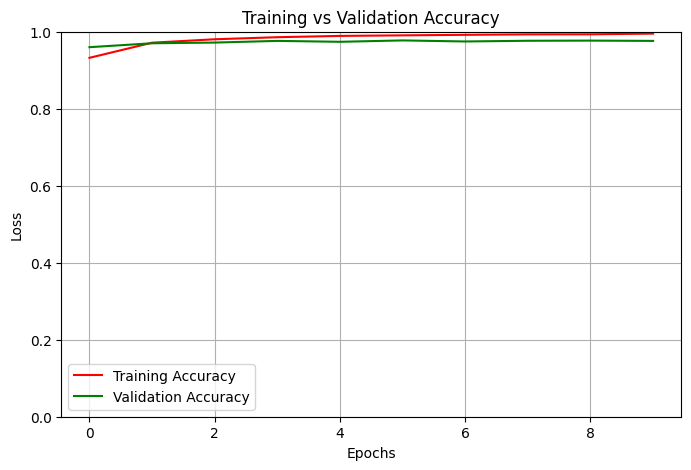

In [17]:
plt.figure(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.plot(ann_history_df.loc[:, ["accuracy"]], label="Training Accuracy", color="red")
plt.plot(ann_history_df.loc[:, ["val_accuracy"]], label="Validation Accuracy", color="green")

plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="best")

plt.show()

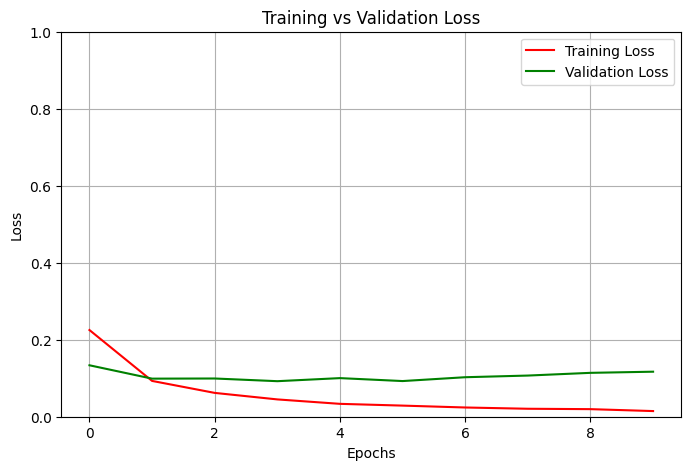

In [18]:
plt.figure(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.plot(ann_history_df.loc[:, ["loss"]], label="Training Loss", color="red")
plt.plot(ann_history_df.loc[:, ["val_loss"]], label="Validation Loss", color="green")

plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="best")

plt.show()

In [19]:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0977 - accuracy: 0.9777


[0.09767025709152222, 0.9776999950408936]

So lets verify by few examples, lets check first three images in test set

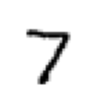

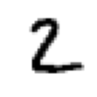

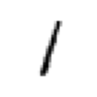

In [20]:
for i in range(3):
  plt.figure(figsize=(1,1))
  plt.imshow(x_test[i], cmap="binary")
  plt.axis("off")
  plt.show()

Now we will predict first three values using the model we trained.

In [21]:
prediction = ann.predict(x_test[:3])

1/1 [==============================] - 0s 177ms/step


In [22]:
for i in range(3):
  y_prob = prediction[i]
  print(np.argmax(y_prob.round(5)))

7
2
1
